# Worksheet 21

Name: Jian Xie  
UID: U75516303  

### Topics

- Logistic Regression
- Gradient Descent

## Logistic Regression

In [2]:
import ipympl

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = np.array(list(filter(lambda x : x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# CIRCLE
def generate_circle_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# XOR
def generate_xor_data():
    X = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]])
    Y = np.array([x[0]^x[1] for x in X])
    return X, Y

a) Using the above code, generate and plot data that is linearly separable.

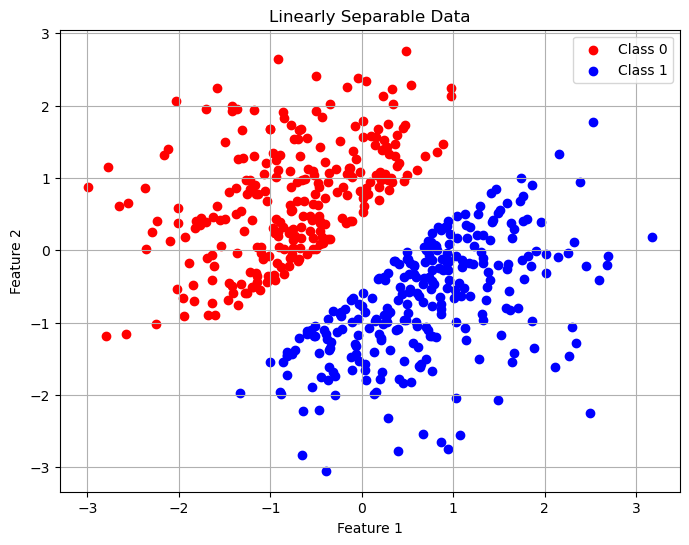

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

# Set random seed for reproducibility
np.random.seed(0)

# Generate initial blob data
centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

# Function to generate linearly separable data
def generate_line_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x: x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# Generate linearly separable data
X, Y = generate_line_data(t)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='blue', label='Class 1')
plt.title('Linearly Separable Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

b) Fit a logistic regression model to the data a print out the coefficients.

In [5]:
model = LogisticRegression().fit(X, Y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[ 4.11337993 -4.10105513]]
Intercept: [0.05839469]


c) Using the coefficients, plot the line through the scatter plot you created in a). (Note: you need to do some math to get the line in the right form)

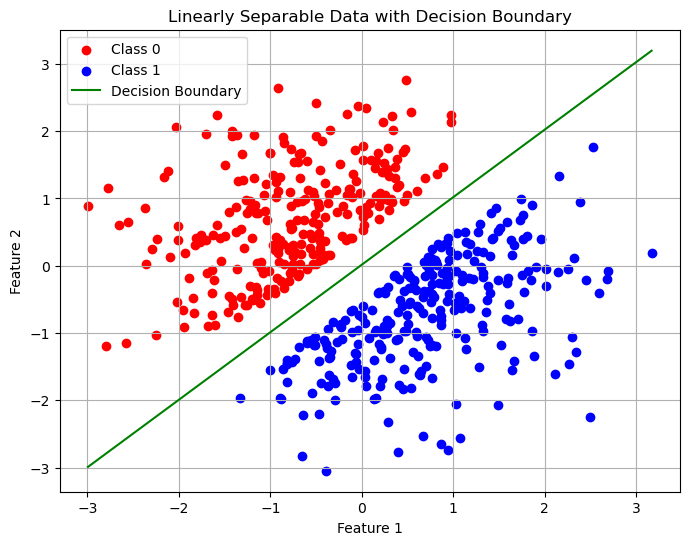

In [6]:
coef = model.coef_[0]
intercept = model.intercept_[0]

# Calculate decision boundary
x_values = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
y_values = -(intercept + coef[0] * x_values) / coef[1]

# Plot the data along with the decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='blue', label='Class 1')
plt.plot(x_values, y_values, label='Decision Boundary', color='green')
plt.title('Linearly Separable Data with Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

d) Using the above code, generate and plot the CIRCLE data.

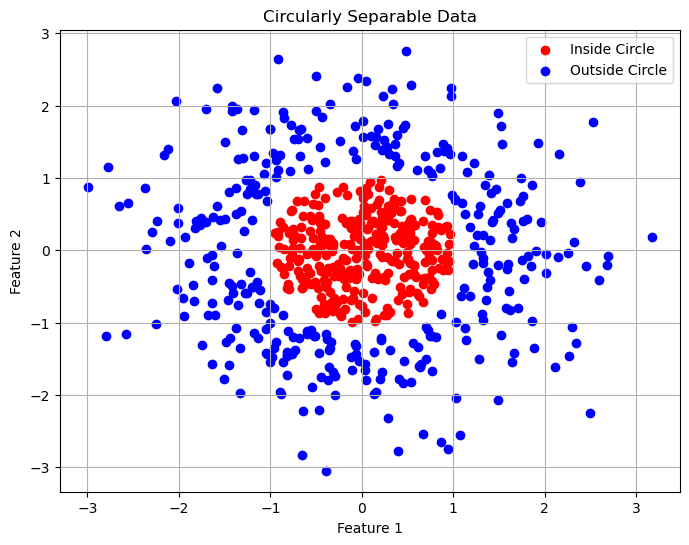

In [5]:
# Function to generate circularly separable data
def generate_circle_data(t):
    centers = [[0, 0]]
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or 
                                      (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# Generate circularly separable data
X_circle, Y_circle = generate_circle_data(t)

# Plot the circular data
plt.figure(figsize=(8, 6))
plt.scatter(X_circle[Y_circle == 0][:, 0], X_circle[Y_circle == 0][:, 1], color='red', label='Inside Circle')
plt.scatter(X_circle[Y_circle == 1][:, 0], X_circle[Y_circle == 1][:, 1], color='blue', label='Outside Circle')
plt.title('Circularly Separable Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

e) Notice that the equation of an ellipse is of the form $$ax^2 + by^2 = c$$

Fit a logistic regression model to an appropriate transformation of X.

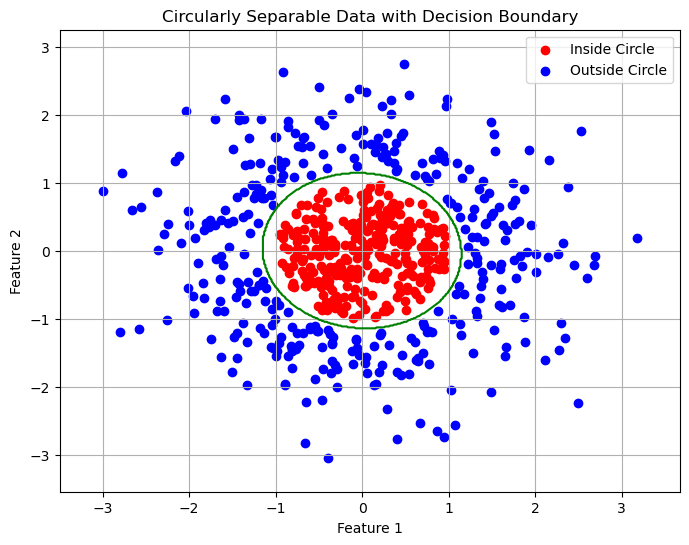

In [11]:
from sklearn.preprocessing import PolynomialFeatures

# Create a polynomial features transformer
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transform the data to include x^2, y^2, and xy terms
X_circle_transformed = poly.fit_transform(X_circle)

# Fit logistic regression to the transformed data
model = LogisticRegression().fit(X_circle_transformed, Y_circle)

# Plot the data along with the decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_circle[Y_circle == 0][:, 0], X_circle[Y_circle == 0][:, 1], color='red', label='Inside Circle')
plt.scatter(X_circle[Y_circle == 1][:, 0], X_circle[Y_circle == 1][:, 1], color='blue', label='Outside Circle')

# Create a grid of values and predict each value's class using the model
x_min, x_max = X_circle[:, 0].min() - 0.5, X_circle[:, 0].max() + 0.5
y_min, y_max = X_circle[:, 1].min() - 0.5, X_circle[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = model.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contour(xx, yy, Z, colors='green', levels=[0.5])
plt.title('Circularly Separable Data with Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

f) Plot the decision boundary using the code below.

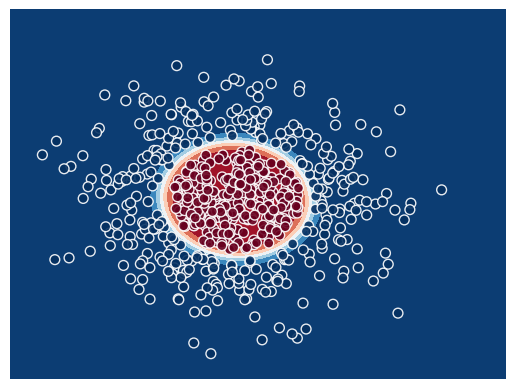

In [14]:
# Create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X_circle[:, 0].min() - .5, X_circle[:, 0].max() + 1
y_min, y_max = X_circle[:, 1].min() - .5, X_circle[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

# Transform mesh data using the polynomial features
meshData_transformed = poly.transform(meshData)

# Make predictions and probability predictions over the mesh
A = model.predict_proba(meshData_transformed)[:, 1].reshape(xx.shape)
Z = model.predict(meshData_transformed).reshape(xx.shape)

# Plotting
fig, ax = plt.subplots()
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(X_circle[:, 0], X_circle[:, 1], c=Y_circle, s=50, cmap='RdBu', edgecolors='w', alpha=0.9)
plt.show()

g) Plot the XOR data. In this 2D space, the data is not linearly separable, but by introducing a new feature $$x_3 = x_1 * x_2$$

(called an interaction term) we should be able to find a hyperplane that separates the data in 3D. Plot this new dataset in 3D.

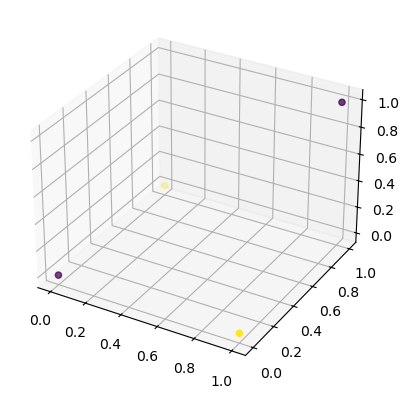

In [15]:
from mpl_toolkits.mplot3d import Axes3D

X, Y = generate_xor_data()
ax = plt.axes(projection='3d')
ax.scatter3D(X[: , 0], X[: , 1], X[: , 0]* X[: , 1], c=Y)
plt.show()

h) Apply a logistic regression model using the interaction term. Plot the decision boundary.

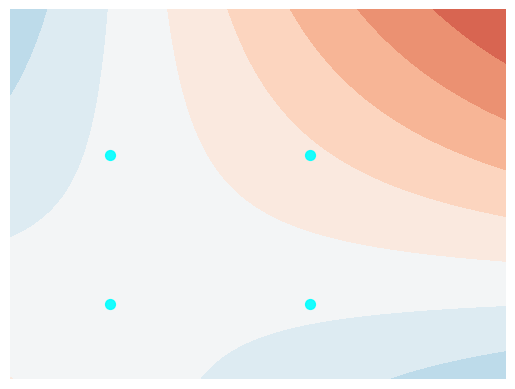

In [16]:
poly = PolynomialFeatures(interaction_only=True)
lr = LogisticRegression(verbose=0)
model = make_pipeline(poly, lr).fit(X, Y)

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = model.predict(meshData).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=Y, s=50, alpha=0.9)
plt.show()

0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75


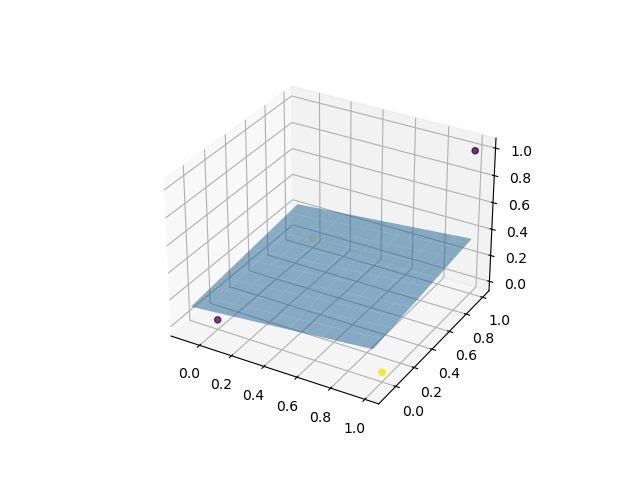

In [20]:
%matplotlib widget
for i in range(20000):
    for solver in ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:
        X_transform = PolynomialFeatures(interaction_only=True, include_bias=False).fit_transform(X)
        model = LogisticRegression(verbose=0, solver=solver, random_state=i, max_iter=10000)
        model.fit(X_transform, Y)
        print(model.score(X_transform, Y))
        if model.score(X_transform, Y) > .75:
            print("random state = ", i)
            print("solver = ", solver)
            break

print(model.coef_)
print(model.intercept_)

xx, yy = np.meshgrid([x / 10 for x in range(-1, 11)], [x / 10 for x in range(-1, 11)])
z = - model.intercept_ / model.coef_[0][2] - model.coef_[0][0] * xx / model.coef_[0][2] - model.coef_[0][1] * yy / model.coef_[0][2]

ax = plt.axes(projection='3d')
ax.scatter3D(X[: , 0], X[: , 1], X[: , 0]* X[: , 1], c=Y)
ax.plot_surface(xx, yy, z, alpha=0.5)
plt.show()

i) Using the code below that generates 3 concentric circles, fit a logisitc regression model to it and plot the decision boundary.

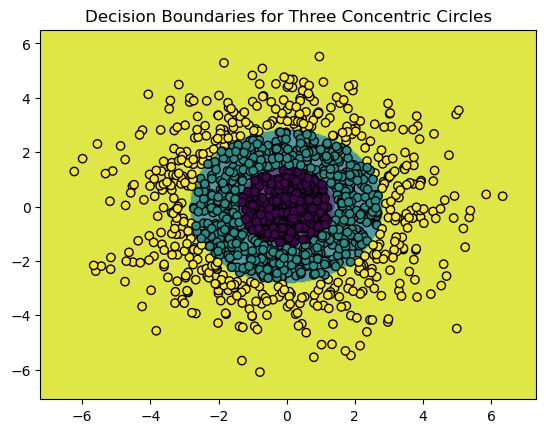

In [7]:
# Generate the initial blob data
centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=1500, centers=centers, cluster_std=2, random_state=0)


# Function to generate data for three concentric circles
def generate_circles_data(t):
    def label(x):
        if x[0]**2 + x[1]**2 >= 2 and x[0]**2 + x[1]**2 < 8:
            return 1
        if x[0]**2 + x[1]**2 >= 8:
            return 2
        return 0
    X = np.array(list(filter(lambda x: (x[0]**2 + x[1]**2 < 1.8 or x[0]**2 + x[1]**2 > 2.2) and 
                                        (x[0]**2 + x[1]**2 < 7.8 or x[0]**2 + x[1]**2 > 8.2), t)))
    Y = np.array([label(x) for x in X])
    return X, Y

X, Y = generate_circles_data(t)


# Create a logistic regression model with polynomial features
poly = PolynomialFeatures(2)
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
model = make_pipeline(poly, lr)
model.fit(X, Y)


# Create a mesh to plot the decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Predict the class for each point on the mesh
meshData = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(meshData)  # This uses the pipeline, which includes the transformation
Z = Z.reshape(xx.shape)


# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap='viridis')
plt.title('Decision Boundaries for Three Concentric Circles')
plt.show()

## Gradient Descent

Recall in Linear Regression we are trying to find the line $$y = X \beta$$ that minimizes the sum of square distances between the predicted `y` and the `y` we observed in our dataset:

$$\mathcal{L}(\mathbf{\beta}) = \Vert \mathbf{y} - X\mathbf{\beta} \Vert^2$$

We were able to find a global minimum to this loss function but we will try to apply gradient descent to find that same solution.

a) Implement the `loss` function to complete the code and plot the loss as a function of beta.

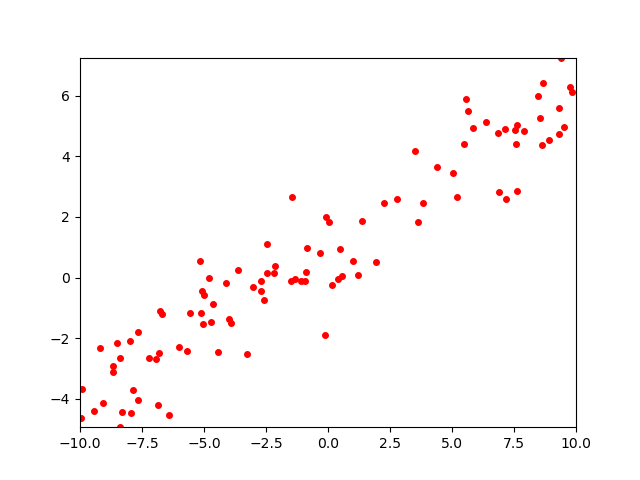

In [11]:
%matplotlib widget
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

beta = np.array([ 1 , .5 ])
xlin = -10.0 + 20.0 * np.random.random(100)
X = np.column_stack([np.ones((len(xlin), 1)), xlin])
y = beta[0]+(beta[1]*xlin)+np.random.randn(100)

fig, ax = plt.subplots()
ax.plot(xlin, y,'ro',markersize=4)
ax.set_xlim(-10, 10)
ax.set_ylim(min(y), max(y))
plt.show()

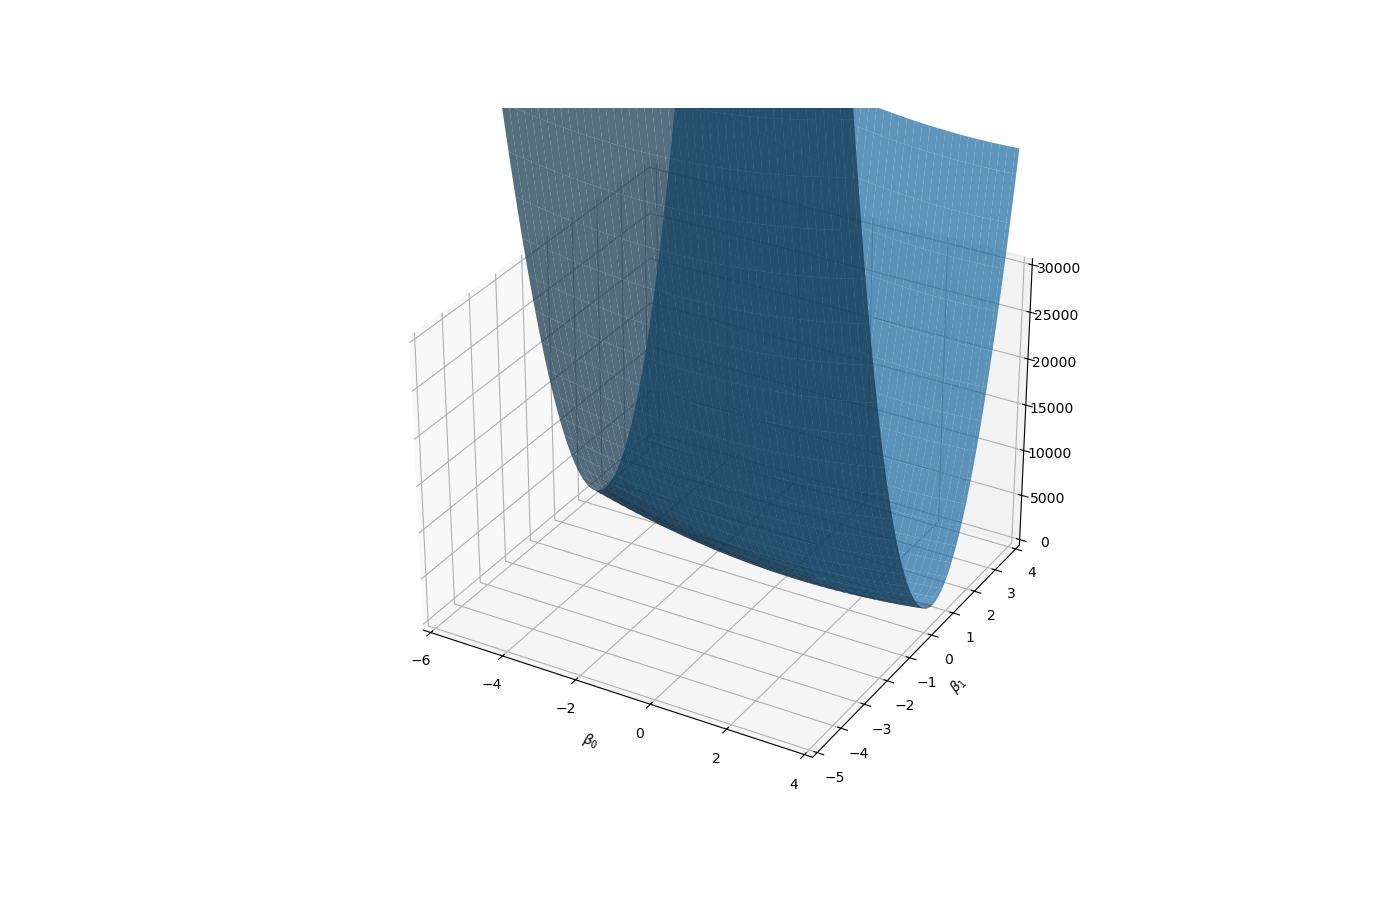

In [12]:
b0 = np.arange(-5, 4, 0.1)
b1 = np.arange(-5, 4, 0.1)
b0, b1 = np.meshgrid(b0, b1)

def loss(X, y, beta):
    y_pred = X @ beta
    residuals = y - y_pred
    return np.sum(residuals ** 2)


def get_cost(B0, B1):
    res = []
    for b0, b1 in zip(B0, B1):
        line = []
        for i in range(len(b0)):
            beta = np.array([b0[i], b1[i]])
            line.append(loss(X, y, beta))
        res.append(line)
    return np.array(res)

cost = get_cost(b0, b1)
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_xlim(-6, 4)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')
ax.set_ylim(-5, 4)
ax.set_zlim(0, 30000)

# Creating plot
ax.plot_surface(b0, b1, cost, alpha=.7)
 
# show plot
plt.show()

Since the loss is

$$\mathcal{L}(\mathbf{\beta}) = \Vert \mathbf{y} - X\mathbf{\beta} \Vert^2 = \beta^T X^T X \beta - 2\mathbf{\beta}^TX^T\mathbf{y}  + \mathbf{y}^T\mathbf{y}$$

The gradient is

$$\nabla_\beta \mathcal{L}(\mathbf{\beta}) = 2X^T X \beta - 2X^T\mathbf{y}$$

b) Implement the gradient function below and complete the gradient descent algorithm

In [13]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

TEMPFILE = "temp.png"

def snap(betas, losses):
    # Creating figure
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')
    ax.view_init(20, -20)
    ax.set_xlim(-5, 4)
    ax.set_xlabel(r'$\beta_0$')
    ax.set_ylabel(r'$\beta_1$')
    ax.set_ylim(-5, 4)
    ax.set_zlim(0, 30000)

    # Creating plot
    ax.plot_surface(b0, b1, cost, color='b', alpha=.7)
    ax.plot(np.array(betas)[:,0], np.array(betas)[:,1], losses, 'o-', c='r', markersize=10, zorder=10)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))


def gradient(X, y, beta):
    # Compute the gradient of the loss
    return 2 * X.T @ (X @ beta - y)


def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap(betas, losses))
        # Update beta_hat using the gradient
        beta_hat = beta_hat - learning_rate * gradient(X, y, beta_hat)

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)


beta_start = np.array([-5, -2])
learning_rate = 0.0002 # try .0005
images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 10, images)

images[0].save(
    'gd.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)

c) Use the code above to create an animation of the linear model learned at every epoch.

In [15]:
def snap_model(beta):
    xplot = np.linspace(-10,10,50)
    yestplot = beta[0] + beta[1] * xplot
    fig, ax = plt.subplots()
    ax.plot(xplot, yestplot,'b-',lw=2)
    ax.plot(xlin, y,'ro',markersize=4)
    ax.set_xlim(-10, 10)
    ax.set_ylim(min(y), max(y))
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))


def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap_model(beta_hat))
        beta_hat = beta_hat - learning_rate * gradient(X, y, beta_hat)

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)


images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 100, images)

images[0].save(
    'model.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=200
)

In logistic regression, the `loss` is the negative log-likelihood

$$ \mathcal{l}(\mathbf{\beta}) = - \frac{1}{N} \sum_{i=1}^{N} y_i \log(\sigma(x_i \beta)) + (1 - y_i)\log(1 - \sigma(x_i \beta))$$

the gradient of which is:

$$\nabla_\beta \mathcal{l}(\mathbf{\beta}) = \frac{1}{N} \sum_{i=1}^{N} x_i (y_i - \sigma(x_i \beta)) $$

d) Plot the loss as a function of b.

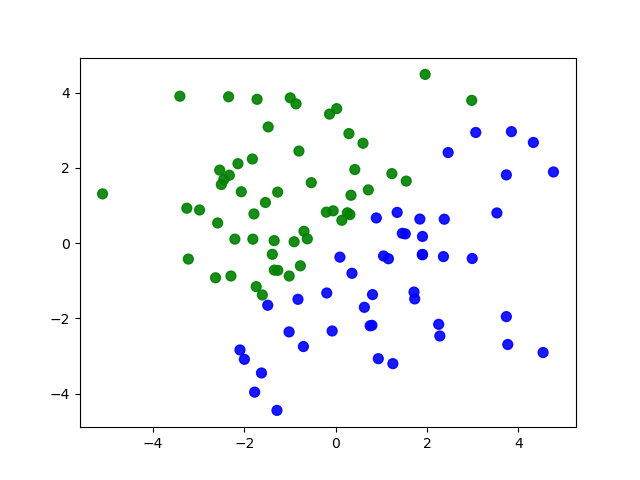

In [16]:
%matplotlib widget
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=100, centers=centers, cluster_std=2, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = t
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

X, y = generate_line_data()

cs = np.array([x for x in 'gb'])
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color=cs[y].tolist(), s=50, alpha=0.9)
plt.show()

C:\Users\Zie\AppData\Local\Temp\ipykernel_13072\3698975762.py:14: RuntimeWarning: divide by zero encountered in log
  log_likelihood = y * np.log(predicted) + (1 - y) * np.log(1 - predicted)
C:\Users\Zie\AppData\Local\Temp\ipykernel_13072\3698975762.py:14: RuntimeWarning: invalid value encountered in multiply
  log_likelihood = y * np.log(predicted) + (1 - y) * np.log(1 - predicted)


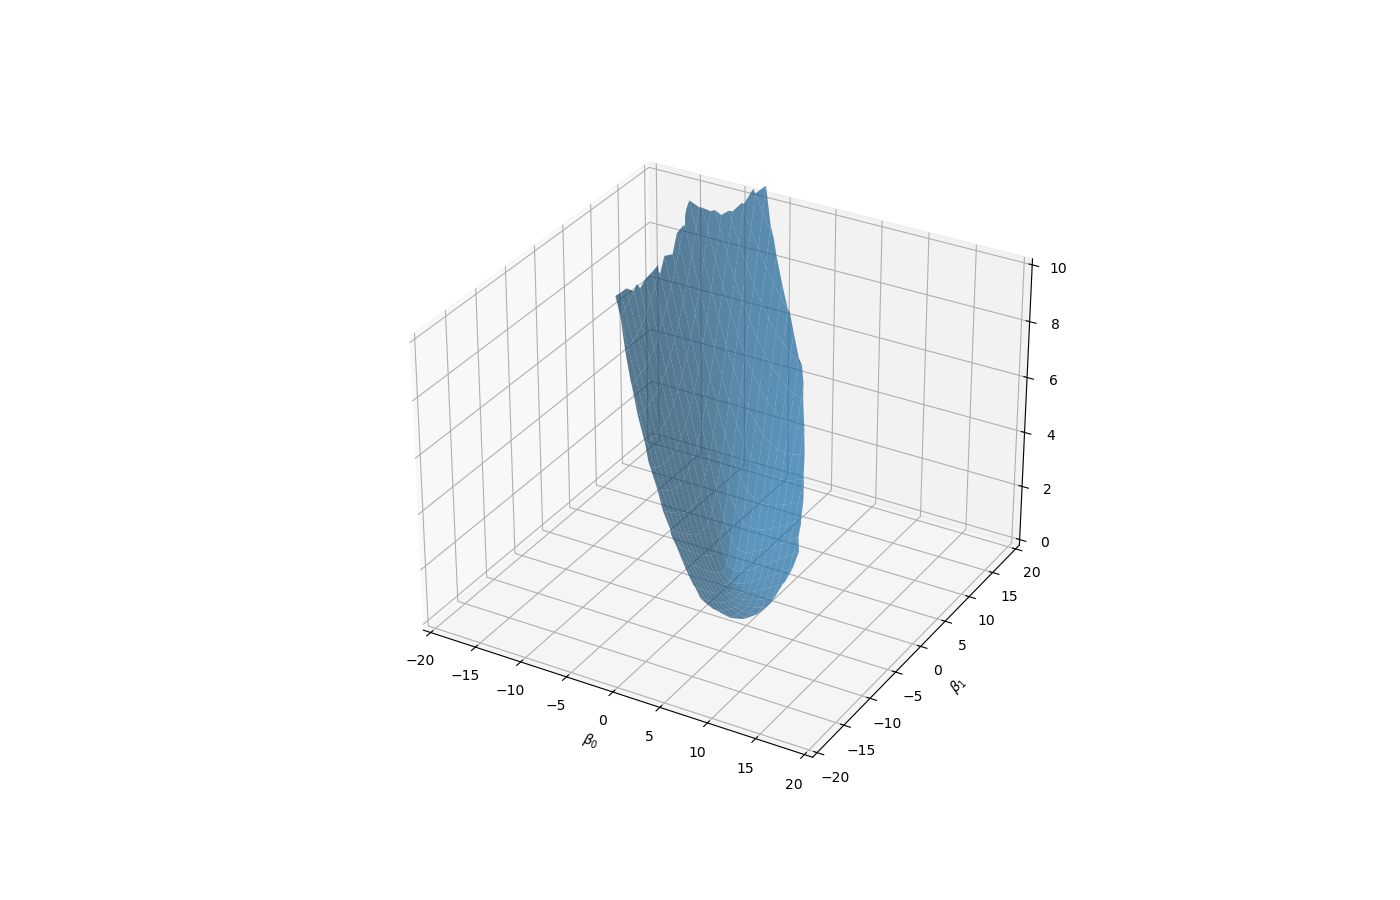

In [17]:
b0 = np.arange(-20, 20, 0.1)
b1 = np.arange(-20, 20, 0.1)
b0, b1 = np.meshgrid(b0, b1)


def sigmoid(x):
    e = np.exp(x)
    return e / (1 + e)


def loss(X, y, beta):
    z = X @ beta
    predicted = sigmoid(z)
    log_likelihood = y * np.log(predicted) + (1 - y) * np.log(1 - predicted)
    return -np.mean(log_likelihood)  # Negative of mean log likelihood


def get_cost(B0, B1):
    res = []
    for b0, b1 in zip(B0, B1):
        line = []
        for i in range(len(b0)):
            beta = np.array([b0[i], b1[i]])
            line.append(loss(X, y, beta))
        res.append(line)
    return np.array(res)

cost = get_cost(b0, b1)

# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_xlim(-20, 20)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')
ax.set_ylim(-20, 20)
ax.set_zlim(0, 10)

ax.plot_surface(b0, b1, cost, alpha=.7)
 
plt.show()

e) Plot the loss at each iteration of the gradient descent algorithm.

In [18]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

TEMPFILE = "temp.png"

def snap(betas, losses):
    # Creating figure
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')
    ax.view_init(10, 10)
    ax.set_xlabel(r'$\beta_0$')
    ax.set_ylabel(r'$\beta_1$')
    ax.set_ylim(-20, 20)
    ax.set_zlim(0, 10)

    # Creating plot
    ax.plot_surface(b0, b1, cost, color='b', alpha=.7)
    ax.plot(np.array(betas)[:,0], np.array(betas)[:,1], losses, 'o-', c='r', markersize=10, zorder=10)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))


def gradient(X, y, beta):
    predictions = sigmoid(X @ beta)
    errors = y - predictions
    return -X.T @ errors / len(X)


def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap(betas, losses))
        beta_hat = beta_hat - learning_rate * gradient(X, y, beta_hat)

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)


beta_start = np.array([-5, -2])
learning_rate = 0.1
images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 10, images)

images[0].save(
    'gd_logit.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)

f) Create an animation of the logistic regression fit at every epoch.

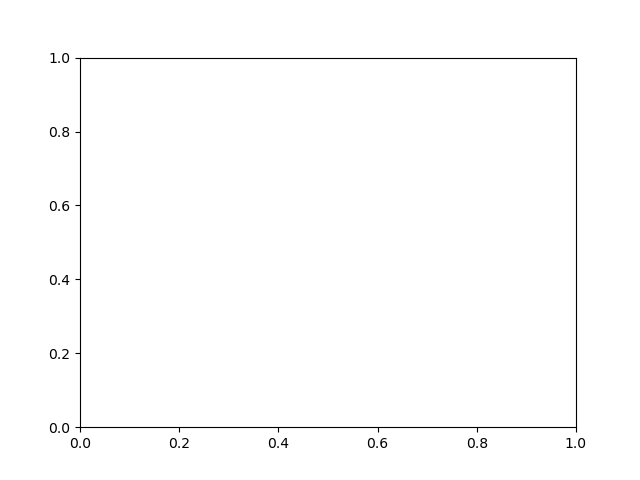

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import sklearn.datasets as datasets

# Generate synthetic data
centers = [[-1, -1], [1, 1]]
t, _ = datasets.make_blobs(n_samples=100, centers=centers, cluster_std=2, random_state=0)

def generate_line_data():
    X = t
    Y = np.array([1 if x[0] + x[1] >= 0 else 0 for x in X])
    return X, Y

X, y = generate_line_data()
X = np.hstack([np.ones((X.shape[0], 1)), X])  # Add intercept term

# Define sigmoid and loss functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss(X, y, beta):
    predictions = sigmoid(X @ beta)
    log_likelihood = y * np.log(predictions + 1e-9) + (1 - y) * np.log(1 - predictions + 1e-9)
    return -np.mean(log_likelihood)

# Define the gradient function
def gradient(X, y, beta):
    predictions = sigmoid(X @ beta)
    errors = y - predictions
    return -X.T @ errors / len(X)

# Function to update the plot for animation
def plot_decision_boundary(X, y, beta, ax):
    ax.clear()
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = sigmoid(np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()] @ beta)
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap='RdBu', alpha=0.7)
    ax.scatter(X[:, 1], X[:, 2], c=y, cmap='RdBu', edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title('Logistic Regression Decision Boundary')

# Perform gradient descent and update plot in each iteration
def gradient_descent(X, y, beta_hat, learning_rate, epochs):
    betas = [beta_hat.copy()]
    for i in range(epochs):
        beta_hat -= learning_rate * gradient(X, y, beta_hat)
        betas.append(beta_hat.copy())
    return betas

def update(i):
    ax.cla()  # Clear the axes
    plot_decision_boundary(X, y, betas[i], ax)

# Set up the figure and axes for the animation
fig, ax = plt.subplots()
beta_start = np.array([0.0, -1.0, 1.0])  # Initial beta values including intercept
learning_rate = 0.1
epochs = 100

# Run gradient descent
betas = gradient_descent(X, y, beta_start, learning_rate, epochs)

ani = FuncAnimation(fig, update, frames=range(epochs), repeat=True)
plt.show()


g) Modify the above code to evaluate the gradient on a random batch of the data. Overlay the true loss curve and the approximation of the loss in your animation.

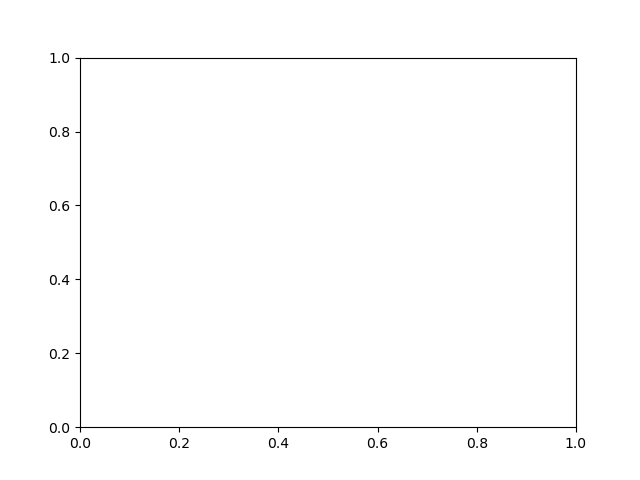

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_blobs

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function
def loss(X, y, beta):
    predictions = sigmoid(X @ beta)
    log_likelihood = y * np.log(predictions + 1e-9) + (1 - y) * np.log(1 - predictions + 1e-9)
    return -np.mean(log_likelihood)

# Gradient function for a batch of data
def gradient_batch(X, y, beta, batch_size):
    indices = np.random.choice(len(X), batch_size, replace=False)
    X_batch = X[indices]
    y_batch = y[indices]
    predictions = sigmoid(X_batch @ beta)
    errors = y_batch - predictions
    grad = -X_batch.T @ errors / batch_size
    return grad

# Gradient descent function
def gradient_descent(X, y, beta_hat, learning_rate, epochs, batch_size):
    betas = [beta_hat.copy()]
    true_losses = [loss(X, y, beta_hat)]  # True loss for the full dataset
    batch_losses = []  # Loss for each batch

    for i in range(epochs):
        grad = gradient_batch(X, y, beta_hat, batch_size)
        beta_hat -= learning_rate * grad
        betas.append(beta_hat.copy())
        true_losses.append(loss(X, y, beta_hat))
        batch_losses.append(loss(X, y, beta_hat))  # Compute loss for the current batch

    return betas, true_losses, batch_losses

# Function to plot decision boundary
def plot_decision_boundary(X, y, beta, ax):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict over the meshgrid
    Z = sigmoid(np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()] @ beta)
    Z = Z.reshape(xx.shape)

    # Contour plot
    ax.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap='RdBu', alpha=0.7)
    ax.scatter(X[:, 1], X[:, 2], c=y, cmap='RdBu', edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

# Data generation
X, y = make_blobs(n_samples=100, centers=[[2, 2], [-2, -2]], cluster_std=1.05, random_state=42)
X = np.hstack([np.ones((X.shape[0], 1)), X])  # Add intercept term

# Initialize parameters for gradient descent
beta_start = np.array([0.0, -1.0, 1.0])  # Including the intercept
learning_rate = 0.1
epochs = 200
batch_size = 20  # Mini-batch size for stochastic gradient descent

# Run gradient descent
betas, true_losses, batch_losses = gradient_descent(X, y, beta_start, learning_rate, epochs, batch_size)

# Setup figure for animation
fig, ax = plt.subplots()

# Update function for animation
def update(i):
    ax.clear()
    plot_decision_boundary(X, y, betas[i], ax)
    # Plot the true and approximate loss
    ax.plot(true_losses, label='True Loss', color='green')
    ax.plot(batch_losses, label='Batch Loss', color='red')
    ax.set_title(f'Epoch: {i}/{epochs}')
    ax.legend()

ani = FuncAnimation(fig, update, frames=np.arange(0, epochs), repeat=True)

plt.show()


h) Below is a sandox where you can get intuition about how to tune gradient descent parameters:

In [42]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

TEMPFILE = "temp.png"

def snap(x, y, pts, losses, grad):
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')
    ax.view_init(20, -20)
    ax.plot_surface(x, y, loss(np.array([x, y])), color='r', alpha=.4)
    ax.plot(np.array(pts)[:,0], np.array(pts)[:,1], losses, 'o-', c='b', markersize=10, zorder=10)
    ax.plot(np.array(pts)[-1,0], np.array(pts)[-1,1], -1, 'o-', c='b', alpha=.5, markersize=7, zorder=10)
    
    # Plot Gradient Vector
    X, Y, Z = [pts[-1][0]], [pts[-1][1]], [-1]
    U, V, W = [-grad[0]], [-grad[1]], [0]
    ax.quiver(X, Y, Z, U, V, W, color='g')
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def loss(x):
    return np.sin(sum(x**2)) # change this

def gradient(x):
    return 2 * x * np.cos(sum(x**2)) # change this

def gradient_descent(x, y, init, learning_rate, epochs):
    images, losses, pts = [], [loss(init)], [init]
    for _ in range(epochs):
        grad = gradient(init)
        images.append(snap(x, y, pts, losses, grad))
        init = init - learning_rate * grad
        losses.append(loss(init))
        pts.append(init)
    return images

init = np.array([1, -1]) # change this
learning_rate = 0.1 # change this
x, y = np.meshgrid(np.arange(-2, 2, 0.1), np.arange(-2, 2, 0.1)) # change this
images = gradient_descent(x, y, init, learning_rate, 12)

images[0].save(
    'gradient_descent.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)